# Recurrent Neural Networks for Sequences
## Sentiment Analysis with the IMDb Dataset
## Jade Gee
---
---

## Introduction

Recurrent Neural Networks (RNN) are a class of artificial neural networks that are used with sequential data. RNNs can use their internal memory to process variable length sequences of inputs which makes them good for connected handwriting or speech recognition. They process sequences of data to perform binary classification which predicts whether a given review's sentiment is positive or negative. The *recurrent* aspect comes from the loops within the neural network that cause the output of one layer to become the input to the the same layer in the next point in time. As we will be using the IMDb movie reviews dataset that is built-in to the `Keras` package, our time step will be the next word in the sequence of words.

These aforementioned loops allow the RNN to learn and remember the relationships of the data in the given sequence. For instance, 

+ Negative Sentiment

    - `The movie is not good.` 
        + Displays a negative sentiment.
    
+ Positive Sentiment

    - `The movie is good.`
        + Displays a positive sentiment, but not as positive as:
    
    - `The movie is excellent!`

Although the initial statement shows `good` which is positive, because it has `not` before it the sentiment is deemed negative.
With this example in mind, the RNN takes into account the relationships between earlier and later parts of a sequence. Since, there can be instances where there can be many words to consider instead of an adjacent sentiment like in our prior example. To account for this, we will use a Long Short-Term Memory (LSTM) layer to make the neural network *recurrent* and optimizes so that it can handle learning for sequences that contain many key words with more arbitrary words between them.

### Applications

RNNs can be used for multiple tasks, such as:

+ predictive text input: displaying possible next words while typing,
+ sentiment analysis
+ inter-language translation, and
+ automated closed captioning in video

### How does it works?

![Basic RNN Structure](basic_rnn.png)

As the image above depicts, basic RNNs are a network of neuron-like nodes that are organized into successive layers. Each node have a one-way (directed) connection to all of the other nodes in the next successive layer with each node having a time-varying real-valued activation. Each connection has a modifiable real-valued weight while nodes are either input nodes, output nodes, or hidden nodes. The recursive neural network applies the same set of weights recursively by traversing the structure in topological order. 

For the purpose of the RNN we will build today, we will use a long short-term memory (LSTM) layer which avoids the vanishing gradient problem. This means that the LSTM prevents back-propagated errors from vanishing which results in the ability for errors to flow backwards through however many virtual layers unfolded in space. In short, the LSTM can learn tasks that require memories of events that happened many discrete time steps earlier.

The LSTM cell is depicted below:

![Long Short-Term Memory Diagram](lstm.png)

---
---

## Data Manipulation
### Import Packages

To build the network we will need to import the following packages:

+ `tensorflow.keras`
    -`datasets`: to access the IMDb data set
    - `utils`: to access the function `plot_model`
        + Allows us to store the visualization of our RNN model after `Keras` assigns the layer names in the image
    - `models`: to access the `Sequential` model
        + Executes our layers sequentially--output of one layer becomes the input for the next.
    - `layers`: to access the functions `Embedding`, `LSTM`, and `Dense`
        + Allows us to add our Embedding, LSTM, and Dense layers.

+ `IPython.display`
    - `Image`: to show the image in the notebook

---

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import plot_model
from IPython.display import Image
%pprint #To turn pretty printing off for display consolidation

Pretty printing has been turned OFF


---
### Gather the Data

For the purposes of this notebook, as stated previously, we will be using the `IMDb` dataset from `tensorflow.keras.datasets` which contains 25,000 training samples and 25,000 testing samples labeled with its positive (1) or negative (0) sentiment. It contains over 88,000 unique words in the dataset. Due to the limits of our CPU, we will only be focusing on the top 10,000 most frequently occurring words as training will take longer with the more data you load.

In [2]:
word_number = 10000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=word_number)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_train: ", X_test.shape)
print("Shape of X_train: ", y_test.shape)

X_train[1]

Shape of X_train:  (25000,)
Shape of y_train:  (25000,)
Shape of X_train:  (25000,)
Shape of X_train:  (25000,)


[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]

As we can see that the `IMDb` data is numerically encoded, in order to see the original text, we need to know the word to which each number corresponds to.

In [3]:
word_toIndex = imdb.get_word_index()
print("Index for great: ",word_toIndex['great'])
print("Index for good:  ", word_toIndex['good'])
print("Classification:   ", y_train[1])

index_toWord = {index: word for (word, index) in word_toIndex.items()}

[index_toWord[i] for i in range(1, 51)]

Index for great:  84
Index for good:   49
Classification:    0


['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be', 'one', 'all', 'at', 'by', 'an', 'they', 'who', 'so', 'from', 'like', 'her', 'or', 'just', 'about', "it's", 'out', 'has', 'if', 'some', 'there', 'what', 'good', 'more']

The word with the ranking `1` is the most frequently occurring word, `2` the second, and so on. As such, the dictionary values begin with `1` in each encoded review has its ranking values are offset by 3 because the package `Keras` reserves the values 0, 1, and 2 for *padding*, *tokens denoting the start of a text sequence for learning*, and *unknown words (words that were not loaded due to adding the* `num_words` *argument in* `load_data`, respectively. In the following code cell, we will account for this offset when transforming the frequency ratings into words.

In [4]:
' '.join([index_toWord.get(i-3, '?') for i in X_train[1]])

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

---
### Prepare the Data

As `Keras` requires all samples to have the same dimensions, we will restrict every review to the same number of words. As such, some of the reviews will need to be padded, while others will need to be truncated. To do this, we will use the `pad_sequences` function to reshape `X_train`'s row samples using a `maxlen=225` which returns a 2-D array.

Once this is completed, we will split the data into training and testing data sets, and confirm that split by checking the shapes of our output for `X_test` and `X_train`.

In [5]:
words_per_review = 225

X_train = pad_sequences(X_train, maxlen=words_per_review)
X_test = pad_sequences(X_test, maxlen=words_per_review)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_train: ", X_test.shape)

Shape of X_train:  (25000, 225)
Shape of X_train:  (25000, 225)


In [6]:
X_test, X_train, y_test, y_train = train_test_split(X_test, y_test, random_state=111, test_size=0.25)

---
## Build the Network

We will use the `Sequential()` model to add the layers to our network adjacently. These layers will be added using functions from the `tensorflow.keras.layers` module.

As our data set is so large, we will reduce its dimensionality by utilizing an embedding layer which will encode each word into a more compact dense-vector representation. This allows the word's context to be captured in the embedding. To embed the layer we will use the `Embedding()`function which takes the following information:

+ `input_dim`: number of unique words
    
+ `output_dim`: size of each word embedding
    
+ `input_length=words_per_review`: number of words in each input sample
   
Once the embedding layer has been added, we will add two additional layers which will be a Long Short-Term Memory (LSTM) layers using the `LSTM()` function. The arguments to this layer are:

+ `units`: number of neurons in the layer
    
+ `dropout`: percentage of neurons to randomly disable when processing the layer's input and output.
    
    - This reduces the over-fitting of the model.
        
+ `recurrent_dropout`: percentage of neurons to randomly disable when the layer's output is fed back into the layer again to allow the network to learn from previously seen information.

+ `return_sequences`: to direct the output of the initial LSTM layer as input into the second LSTM layer.

Lastly, we will add a Dense Output layer using the `Dense()` function which takes in the following arguments:

+ `units`: number of neurons in the layer
    
+ `activation`: the function used to activate
    
We will be using the `sigmoid` function as our activation function which is preferential for binary classification because it will reduce the arbitrary values to a range of $0.0-1.0$, producing a probability. The following code cell will create our neural network that we just described.

In [8]:
# Create the Neural Network
RNN = Sequential()

# Add the Embedding Layer
RNN.add(Embedding(input_dim=word_number, output_dim=128, input_length=words_per_review))

# Add the LSTM Layer
RNN.add(LSTM(units=128, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))
RNN.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

# Add The Dense Layer
RNN.add(Dense(units=1, activation='sigmoid'))

---
## Compile Network

Now it is time to complete the model, so that we can train and evaluate it. 
We will be using the `adam` optimizer to adjust the weights throughout the network, the `binary_crossentropy`method for the loss function, and `accuracy` metrics to check the percentage of successful predictions.

In [9]:
RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Summarize the Network

In [10]:
RNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 225, 128)          1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 225, 128)          131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,543,297
Trainable params: 1,543,297
Non-trainable params: 0
_________________________________________________________________


### Model Visualization

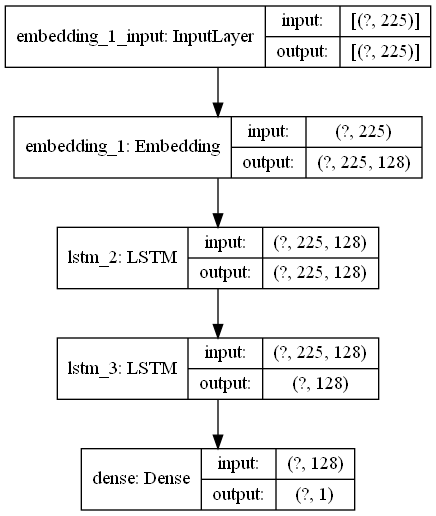

In [11]:
plot_model(RNN, to_file='RNN.png', show_shapes=True, show_layer_names=True)

Image(filename='RNN.png')

---
### Training & Evaluation

For the sake of time and the fact that we have a Embedding layer, two LSTM layers, and a Dense layer; this notebook will only run two epochs (iterations).

In [12]:
RNN.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/3
196/196 [==============================] - 632s 3s/step - loss: 0.5992 - accuracy: 0.6726 - val_loss: 0.4663 - val_accuracy: 0.7859
Epoch 2/3
196/196 [==============================] - 619s 3s/step - loss: 0.3029 - accuracy: 0.8752 - val_loss: 0.3737 - val_accuracy: 0.8446
Epoch 3/3
196/196 [==============================] - 633s 3s/step - loss: 0.1999 - accuracy: 0.9232 - val_loss: 0.4412 - val_accuracy: 0.8292


In [13]:
loss, accuracy = RNN.evaluate(X_test, y_test)
print("\n-----------------------------------------------")
print(f'Loss Percentage: {loss:.10%}')
print(f'Accuracy Percentage: {accuracy:.10%}')
print("-----------------------------------------------")

586/586 [==============================] - 146s 249ms/step - loss: 0.4412 - accuracy: 0.8292

-----------------------------------------------
Loss Percentage: 44.1203325987%
Accuracy Percentage: 82.9173326492%
-----------------------------------------------


---
## Conclusion

<font size="3">Although the accuracy of our model seems low as it is not above 90%, our small neural network model did reasonably well considering it only has four layers and is being computed on a CPU. </font>

### For more information regarding Recurrent Neural Networks, please see:
<br>
<font size="3">

+ [Recurrent Neural Network on Wiki](https://en.wikipedia.org/wiki/Recurrent_neural_network)
<br>
    
+ [Keras LSTM Tutorial](https://adventuresinmachinelearning.com/keras-lstm-tutorial/)
<br>
    
+ [Understanding LSTM and Its Diagrams](https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714)
<br>
    
+ [Animate RNN, LSTM, and GRU](https://towardsdatascience.com/animated-rnn-lstm-and-gru-ef124d06cf45)
<br>
    
+ [Fundamentals of Deep Learning: Intro to LSTM](https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/)

</font>

---
---